# Analysis of Football Transfers 2021


# Import necessary libraries

In [204]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Warning of chained assignments was switched off 



In [205]:
pd.set_option('mode.chained_assignment', None)
pd.set_option('display.max_rows', 50)

# Loading data into Pandas

In [206]:
df = pd.read_csv('football_transfers_2021.csv' ,skip_blank_lines=True)

In [207]:
df

,player_name,position,age,team_origin,country_origin,league_origin,team_dest,country_dest,league_dest,transfer_fee,date
0,Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
1,Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
2,Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
3,Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
4,Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...
65484,Alexander Hjaelmhof,Central Midfield,20.0,San Diego State,United States,United States,Retired,NaN,NaN,-,2021-12-31
65485,Sehmus Aslan,Left Winger,21.0,1922 Konya,Turkey,2.Lig Beyaz,Without Club,NaN,NaN,-,2021-12-31
65486,Daniel Rodríguez,Right-Back,27.0,Coimbra,Portugal,Liga Sabseg,Without Club,NaN,NaN,-,2021-12-31
65487,Marcão,Goalkeeper,21.0,Coritiba FC B,Brazil,Brazil,Coritiba FC,Brazil,Série B,-,2021-12-31


## Renaming columns of dataframe and set index to a Player column

In [208]:
df = df.rename(columns={
                "player_name":"Player", 
                "position":"Position",
                "age":"Age",
                "team_origin":"Team Origin",
                "country_origin":"Country Origin",
                "league_origin":"League Origin",
                "team_dest":"Team Destination",
                "country_dest":"Country Destination",
                "league_dest":"League Destination",
                "transfer_fee":"Transfer Fee (€)",
                "date":"Date"})

In [209]:
df.set_index('Player', inplace=True)


In [210]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Alexander Hjaelmhof,Central Midfield,20.0,San Diego State,United States,United States,Retired,NaN,NaN,-,2021-12-31
Sehmus Aslan,Left Winger,21.0,1922 Konya,Turkey,2.Lig Beyaz,Without Club,NaN,NaN,-,2021-12-31
Daniel Rodríguez,Right-Back,27.0,Coimbra,Portugal,Liga Sabseg,Without Club,NaN,NaN,-,2021-12-31


# Exploratory Data Analysis (EDA) & Data Transformation and Cleaning

In [211]:
df.columns

Index(['Position', 'Age', 'Team Origin', 'Country Origin', 'League Origin',
       'Team Destination', 'Country Destination', 'League Destination',
       'Transfer Fee (€)', 'Date'],
      dtype='object')

In [212]:
df.dtypes

Position                object
Age                    float64
Team Origin             object
Country Origin          object
League Origin           object
Team Destination        object
Country Destination     object
League Destination      object
Transfer Fee (€)        object
Date                    object
dtype: object

### Looking at Null values in the dataframe

In [213]:
for col in df.columns:
    pct_missing = round(np.mean(df[col].isnull()),2)
    print('{}-{}%'.format(col, pct_missing))

Position-0.0%
Age-0.0%
Team Origin-0.0%
Country Origin-0.08%
League Origin-0.08%
Team Destination-0.0%
Country Destination-0.15%
League Destination-0.15%
Transfer Fee (€)-0.0%
Date-0.0%


### Remove all null values

In [214]:
df = df.dropna()

In [215]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,loan transfer,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,?,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,?,2021-12-31


In [216]:
df.dtypes

Position                object
Age                    float64
Team Origin             object
Country Origin          object
League Origin           object
Team Destination        object
Country Destination     object
League Destination      object
Transfer Fee (€)        object
Date                    object
dtype: object

### Changing data in the column Transfer Fee into numeric values in order to make calculations

In [217]:
df['Transfer Fee (€)'].unique

<bound method Series.unique of Player
Dominik Szoboszlai          €22.00m
Filip Stevanovic             €8.50m
Brenden Aaronson             €5.45m
Víctor Dávila                €4.50m
Carlos González              €4.48m
                          ...      
Raffaele Scuderi      loan transfer
Emiliano Tortolano                ?
Dylan Kambo                       ?
Reginaldo                         -
Marcão                            -
Name: Transfer Fee (€), Length: 50531, dtype: object>

In [218]:
df.loc[df['Transfer Fee (€)']=='loan transfer', 'Transfer Fee (€)'] = 0

In [219]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,?,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,?,2021-12-31


In [220]:
df.loc[df['Transfer Fee (€)']=='?', 'Transfer Fee (€)'] = 0

In [221]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [222]:
 df.loc[df['Transfer Fee (€)']=='draft', 'Transfer Fee (€)'] = 0

In [223]:
df.loc[df['Transfer Fee (€)']=='-', 'Transfer Fee (€)'] = 0

In [224]:
df.loc[df['Transfer Fee (€)']=='free transfer', 'Transfer Fee (€)'] = 0

In [225]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [226]:
df.loc[df['Transfer Fee (€)'].str.contains('Loan fee', na=False)] = 0 

In [227]:
df['Transfer Fee (€)'].value_counts()

0          48863
€500Th.       74
€1.00m        71
€200Th.       54
€2.00m        54
           ...  
€7.27m         1
€113Th.        1
€38.40m        1
€28.80m        1
€2Th.          1
Name: Transfer Fee (€), Length: 419, dtype: int64

In [228]:
df.dtypes

Position                object
Age                    float64
Team Origin             object
Country Origin          object
League Origin           object
Team Destination        object
Country Destination     object
League Destination      object
Transfer Fee (€)        object
Date                    object
dtype: object

In [229]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,€22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,€8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,€5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,€4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,€4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [230]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('€', ' ')

In [231]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,NaN,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,NaN,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,NaN,2021-12-31


In [232]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)

In [233]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace(',', '.')


In [234]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)

In [235]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22.00m,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8.50m,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5.45m,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4.50m,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4.48m,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


In [236]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('Th.', 'Th')


C:\Users\dlugo\AppData\Local\Temp\ipykernel_10944\1027505099.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Transfer Fee (€)'] = df['Transfer Fee (€)'].str.replace('Th.', 'Th')


In [237]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].fillna(0)

In [238]:
df['Transfer Fee (€)']=df['Transfer Fee (€)'].replace({"Th":"*1e3", "m":"*1e6"}, regex=True).map(pd.eval).astype(int)

In [239]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31


### The final changing data type to integer on the  Transfer Fee column

In [240]:
df['Age'] = df['Age'].astype('int32')

### Add a month column to the data frame
#### Veryfing if we have any NaN values in the dataframe, then removing these ones and verifying

In [241]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

df = df.dropna(how='all')
df.head()

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01


In [242]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,


In [243]:
df.replace(0, np.nan, inplace=True)


In [244]:
nan_df = df[df.isna().any(axis=1)]
nan_df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Lucas Passerini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Damián Batallini,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lennart Moser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Artem Milevskyi,Centre-Forward,35.0,Dynamo Brest,Belarus,Vysheyshaya Liga,FK Minaj,Ukraine,Premier Liga,NaN,2021-01-01
Gino Parson,Attacking Midfield,41.0,Stadtallendorf,Germany,Regionalliga Südwest,FC Gießen,Germany,Regionalliga Südwest,NaN,2021-01-01
...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,NaN,2021-12-31
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,NaN,2021-12-31
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,NaN,2021-12-31


In [245]:
df = df.dropna(how='all')


In [246]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,
Artem Milevskyi,Centre-Forward,35.0,Dynamo Brest,Belarus,Vysheyshaya Liga,FK Minaj,Ukraine,Premier Liga,NaN,2021-01-01
Gino Parson,Attacking Midfield,41.0,Stadtallendorf,Germany,Regionalliga Südwest,FC Gießen,Germany,Regionalliga Südwest,NaN,2021-01-01
Behrang Safari,Left-Back,35.0,Malmö FF,Sweden,Allsvenskan,Lunds SK,Sweden,Sweden,NaN,2021-01-01
Ariel Cólzera,Second Striker,34.0,CA Temperley,Argentina,Primera Nacional,Deportivo Merlo,Argentina,Argentina,NaN,2021-01-01
Robbie Weir,Central Midfield,32.0,Waterford FC,Ireland,Premier Division,Crusaders,Northern Ireland,Premiership,NaN,2021-01-01


#### Changing NaN values to 0 in the Transfer Fee column

In [247]:
df['Transfer Fee (€)'] = df['Transfer Fee (€)'].replace(np.nan, 0)

#### The dataframe should be blank due to lack of NaN values in the Transfer Fee column

In [248]:
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date
Player,,,,,,,,,,


#### Adding the month column

In [249]:
df['Month'] = df['Date'].str[5:7]


In [250]:
df['Month'] = df['Month'].astype('int')


In [251]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20.0,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000.0,2021-01-01,1
Filip Stevanovic,Left Winger,18.0,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000.0,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20.0,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000.0,2021-01-01,1
Víctor Dávila,Centre-Forward,23.0,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000.0,2021-01-01,1
Carlos González,Centre-Forward,27.0,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000.0,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19.0,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0.0,2021-12-31,12
Emiliano Tortolano,Right Winger,31.0,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0.0,2021-12-31,12
Dylan Kambo,Central Midfield,26.0,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0.0,2021-12-31,12


#### Converting date to datetime and Age and Transfer Fee columns to integer

In [252]:
df['Date'] = pd.to_datetime(df['Date'])
df['Age']=df['Age'].astype("int32")
df['Transfer Fee (€)'] =  df['Transfer Fee (€)'].astype("int32")

In [253]:
df.dtypes

Position                       object
Age                             int32
Team Origin                    object
Country Origin                 object
League Origin                  object
Team Destination               object
Country Destination            object
League Destination             object
Transfer Fee (€)                int32
Date                   datetime64[ns]
Month                           int32
dtype: object

In [254]:
df

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31,12
Emiliano Tortolano,Right Winger,31,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31,12
Dylan Kambo,Central Midfield,26,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31,12


# Basic information about dataframe after  cleaning

In [255]:
df.info(), df.size, df.shape, df.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
Index: 50267 entries, Dominik Szoboszlai to Marcão
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Position             50267 non-null  object        
 1   Age                  50267 non-null  int32         
 2   Team Origin          50267 non-null  object        
 3   Country Origin       50267 non-null  object        
 4   League Origin        50267 non-null  object        
 5   Team Destination     50267 non-null  object        
 6   Country Destination  50267 non-null  object        
 7   League Destination   50267 non-null  object        
 8   Transfer Fee (€)     50267 non-null  int32         
 9   Date                 50267 non-null  datetime64[ns]
 10  Month                50267 non-null  int32         
dtypes: datetime64[ns](1), int32(3), object(7)
memory usage: 4.0+ MB


(None,
 552937,
 (50267, 11),
 object            7
 int32             3
 datetime64[ns]    1
 dtype: int64)

# Calculations & Data Visualisation

### Counting the quantity of transfers 

In [256]:
dfwithoutindex = df.reset_index()

In [257]:
CountingTransfersPerMonth= dfwithoutindex.groupby(['Month'])['Player'].count()

In [258]:
CountingTransfersPerMonth.to_frame()

,Player
Month,
1,7854
2,5215
3,2570
4,1728
5,593
6,646
7,17666
8,8399
9,2957


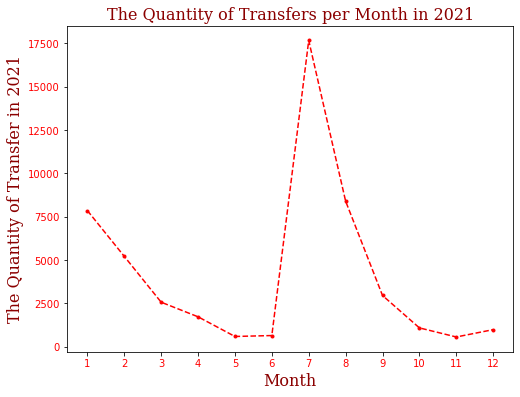

In [259]:
plt.figure(figsize=(8,6))

plt.rcdefaults()


plt.plot(CountingTransfersperMonth, 'r.--')

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.title('The Quantity of Transfers per Month in 2021', fontdict=font)
plt.ylabel('The Quantity of Transfer in 2021', fontdict=font)

plt.yticks(color='red')

plt.xlabel('Month', fontdict=font)
plt.xticks(color='red')


plt.gca().set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])

plt.show()


### The classification of Players by age

<Figure size 3200x1600 with 0 Axes>

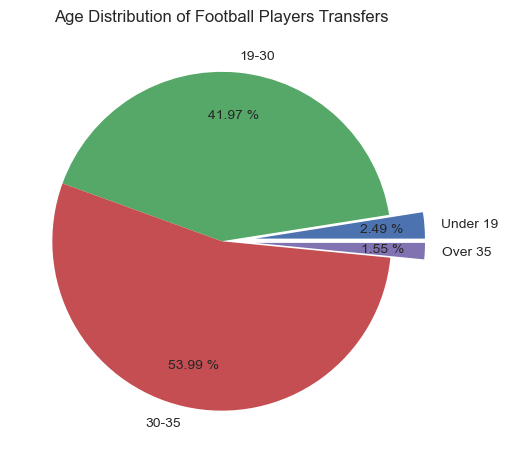

In [260]:
plt.figure(figsize=(32,16))
plt.style.use('seaborn')

Teenager = df.loc[df['Age'] < 19].count()[0]
Youth = df.loc[(df['Age'] >= 19) & (df['Age'] < 30) ].count()[0]
Adults = df.loc[(df['Age'] >= 30) &  df['Age'] < 35 ].count()[0]
Senior = df.loc[df['Age'] >= 35].count()[0]


Age = [Teenager,Youth, Adults, Senior ]
labels = ['Under 19', '19-30', '30-35', 'Over 35' ]
explode = (0.2, 0, 0, 0.2)

fig1, ax1 = plt.subplots()

plt.pie(Age, labels=labels, autopct='%.2f %%', pctdistance=0.75, explode=explode)


plt.title('Age Distribution of Football Players Transfers')

plt.show()


### The histogram of Player's Age

In [261]:
AgeOfPlayers = df['Age']

np.median(AgeOfPlayers), np.mean(AgeOfPlayers)

(24.0, 24.81665904072254)

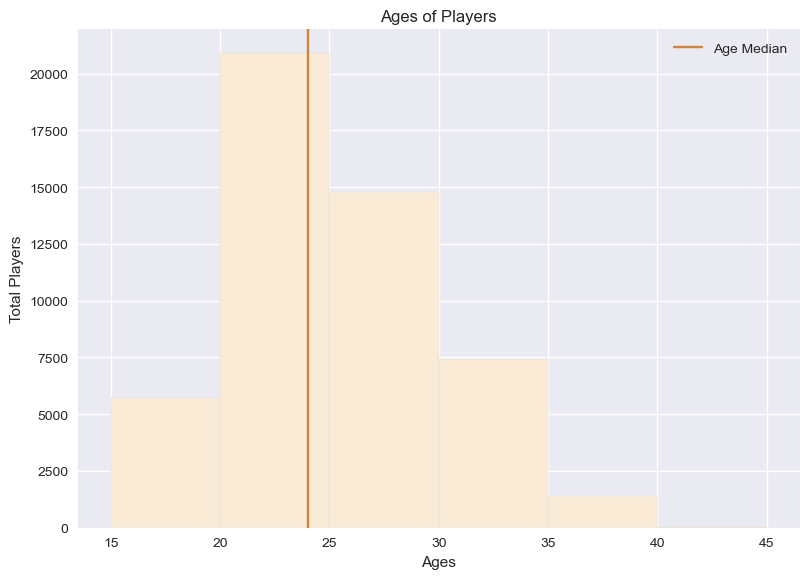

In [262]:
AgeOfPlayers = df['Age']
bins = [15,20,25,30,35,40,45]
MedianAge = np.median(AgeOfPlayers)

plt.hist(AgeOfPlayers, bins=bins,color='#FAEBD7' ,edgecolor='#DCDCDC')

plt.axvline(MedianAge, color='#CD853F', label='Age Median')
plt.legend()

plt.tight_layout()

plt.title('Ages of Players')
plt.xlabel('Ages')
plt.ylabel('Total Players')

plt.show()

#### Dataframe was split into Player with fee transfer and without it to proceed with analysis

In [263]:
df_transfer_players = df.loc[df['Transfer Fee (€)']>0]
df_transfer_players

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Sebastian Lletget,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
Theerathon Bunmathan,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
Dylan Nealis,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12


### The scatter plot Age vs Transfer Fee 2021

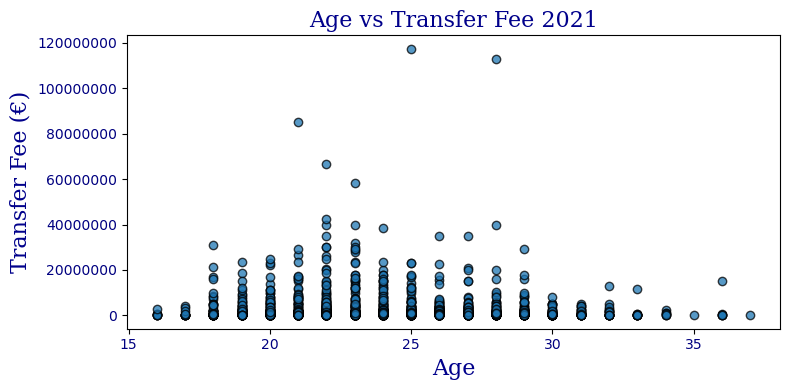

In [264]:

plt.style.use('seaborn')
plt.figure(figsize=(8,4))


font = {'family': 'serif',
        'color':  'darkblue',
        'weight': 'normal',
        'size': 16,
        }

Age = df_transfer_players['Age']
TransferFee = df_transfer_players['Transfer Fee (€)'] 


plt.rcdefaults()

plt.scatter(Age, TransferFee,edgecolor='black',linewidth=1, alpha=0.75)

plt.title('Age vs Transfer Fee 2021', fontdict=font)
plt.ylabel('Transfer Fee (€)', fontdict=font)
plt.yticks(color='#000080')


plt.xlabel('Age', fontdict=font)
plt.xticks(color='#000080')

plt.ticklabel_format(style='plain')

plt.tight_layout()

plt.show()


### The transformation of dataframe to create a bar chart

In [265]:
df_transfer_players

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Sebastian Lletget,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
Theerathon Bunmathan,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
Dylan Nealis,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12


In [266]:
df_transfer_players.loc[df_transfer_players['Position'] == 'attack', 'Position'] = 'Attack'

In [267]:
results =  df_transfer_players.groupby('Position').sum().sort_values('Transfer Fee (€)', ascending=False)
results['Transfer Fee (€)'].to_frame()

,Transfer Fee (€)
Position,
Centre-Forward,963901999
Centre-Back,886407000
Left Winger,667978000
Central Midfield,556894998
Right Winger,336741999
Attacking Midfield,313097999
Defensive Midfield,306312999
Right-Back,284607000
Left-Back,219149000


### Transfer Fee over the position of the player

<Figure size 800x600 with 0 Axes>

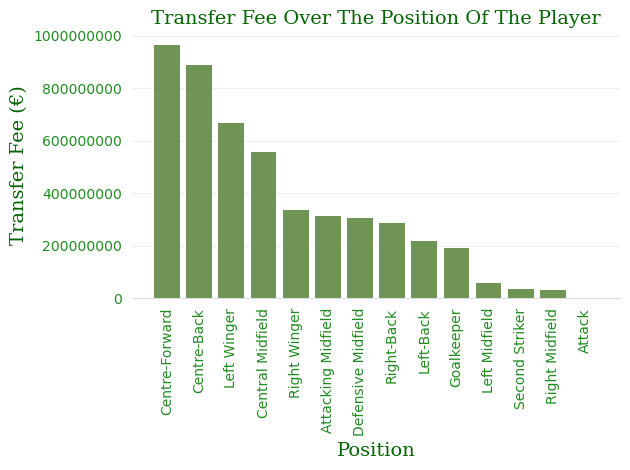

In [268]:
plt.figure(figsize=(8,6))

fig, ax = plt.subplots()


plt.bar(results.index, results['Transfer Fee (€)'], color='#6f9456')
plt.xticks(results.index, rotation = 'vertical', size=10)


font = {'family': 'serif',
        'color':  'darkgreen',
        'weight': 'normal',
        'size': 14,
        }

plt.title('Transfer Fee Over The Position Of The Player', fontdict=font)
plt.ylabel('Transfer Fee (€)', fontdict=font)
plt.yticks(color='#228B22')

plt.xlabel('Position',fontdict=font)
plt.xticks(color='#228B22')



plt.ticklabel_format(style='plain', axis='y')

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

fig.tight_layout()

plt.show()

#### Selecting the best league on the world

In [269]:
df_transfer_players

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Brenden Aaronson,Attacking Midfield,20,Philadelphia,United States,MLS,RB Salzburg,Austria,Bundesliga,5450000,2021-01-01,1
Víctor Dávila,Centre-Forward,23,CF Pachuca,Mexico,Liga MX Clausura,León,Mexico,Liga MX Clausura,4500000,2021-01-01,1
Carlos González,Centre-Forward,27,UNAM Pumas,Mexico,Liga MX Clausura,Tigres UANL,Mexico,Liga MX Clausura,4480000,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Sebastian Lletget,Central Midfield,29,Los Angeles,United States,MLS,New England,United States,MLS,1180000,2021-12-16,12
Theerathon Bunmathan,Left-Back,31,Yokohama F. M.,Japan,J1 League,Buriram Utd.,Thailand,Thai League,200000,2021-12-16,12
Dylan Nealis,Right-Back,23,Nashville,United States,MLS,New York,United States,MLS,182000,2021-12-16,12


In [270]:
df_transfer_players['League Destination'].unique()

array(['Bundesliga', 'Premier League', 'Liga MX Clausura', 'MLS',
       'Super League', 'Super League 1', 'Stars League',
       'Primera División', 'Primera División Clausura', 'Ekstraklasa',
       'Liga Profesional', 'Allsvenskan', 'Liga 1 - Championship group',
       'Liga 1 Clausura', 'Premier Liga', 'Liga 1 - Relegation group',
       'Virsliga', 'Primera B', '2. Bundesliga', 'Protathlima Cyta',
       '1.Division', '1 Liga', 'División Profesional',
       'Superligaen Relegation round', 'efbet Liga',
       'Crystalbet Erovnuli Liga', 'U19 M-Liga', 'A Lyga', 'Ligue 1',
       '3. Liga', 'Fortuna Liga', 'Serie A', 'Liga Bwin',
       'Jupiler Pro League', '1B Pro League', 'LaLiga', 'League One',
       'Superligaen', 'Serie C - B', 'Série A', 'Süper Lig', 'Eredivisie',
       'K League 1', 'Premier League 2', 'FNL-2 Group 2', 'J1 League',
       'Vysheyshaya Liga', 'U16 Youth Football League',
       'Professional League', 'Primera Div. Clausura', 'UAE Pro League',
       '1.Li

In [271]:
League = ["Bundesliga","Premier League","LaLiga","Serie A","Ligue 1"]
Country = ["Germany","England","Spain", "Italy", "France"]

Leagues = df_transfer_players['League Destination'].isin(League)
Countries = df_transfer_players['Country Destination'].isin(Country)

mask = Leagues & Countries

df_top5_leagues = df_transfer_players[mask]

df_top5_leagues

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Joe Scally,Right-Back,18,New York City,United States,MLS,Bor. M'gladbach,Germany,Bundesliga,1800000,2021-01-01,1
Frederik Alves,Centre-Back,21,Silkeborg IF,Denmark,1.Division,West Ham,England,Premier League,1600000,2021-01-01,1
Amad Diallo,Right Winger,18,Atalanta BC,Italy,Serie A,Man Utd,England,Premier League,21300000,2021-01-02,1
...,...,...,...,...,...,...,...,...,...,...,...
Jakub Kiwior,Centre-Back,21,MSK Zilina,Slovakia,Fortuna Liga,Spezia Calcio,Italy,Serie A,1500000,2021-08-31,8
Ridgeciano Haps,Left-Back,28,Feyenoord,Netherlands,Eredivisie,Venezia,Italy,Serie A,500000,2021-08-31,8
Nick Viergever,Centre-Back,32,PSV Eindhoven,Netherlands,Eredivisie,Greuther Fürth,Germany,Bundesliga,300000,2021-08-31,8


In [272]:
TOP5Leagues = df_top5_leagues.groupby(['League Destination']).sum().sort_values('Transfer Fee (€)', ascending=True)
TOP5Leagues_1 = TOP5Leagues.sort_values('Transfer Fee (€)',ascending=False)
TOP5Leagues_1['Transfer Fee (€)'].to_frame()

,Transfer Fee (€)
League Destination,
Premier League,1391070000
Serie A,651340000
Bundesliga,462320000
Ligue 1,351100000
LaLiga,302500000


#### The transfer fee of the League

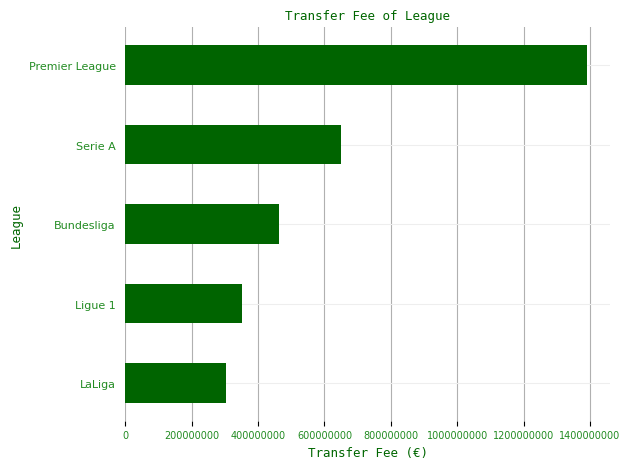

In [273]:
plt.rcdefaults()

fig, ax = plt. subplots()

results =TOP5Leagues['Transfer Fee (€)']

plt.barh(TOP5Leagues.index, results, height=0.5, color='darkgreen')



font = {'family': 'monospace',
        'color':  '#006600',
        'weight': 'normal',
        'size': 9,
        }

plt.ticklabel_format(style='plain', axis='x')
plt.title('Transfer Fee of League', fontdict=font)
plt.ylabel('League', fontdict=font)
plt.yticks(color='forestgreen', size=8)

plt.xlabel('Transfer Fee (€)', fontdict=font)

plt.xticks(color='forestgreen', size=7)

# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Second, remove the ticks as well.
ax.tick_params(bottom=True, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(True)

fig.tight_layout()

plt.grid(True)

plt.show()


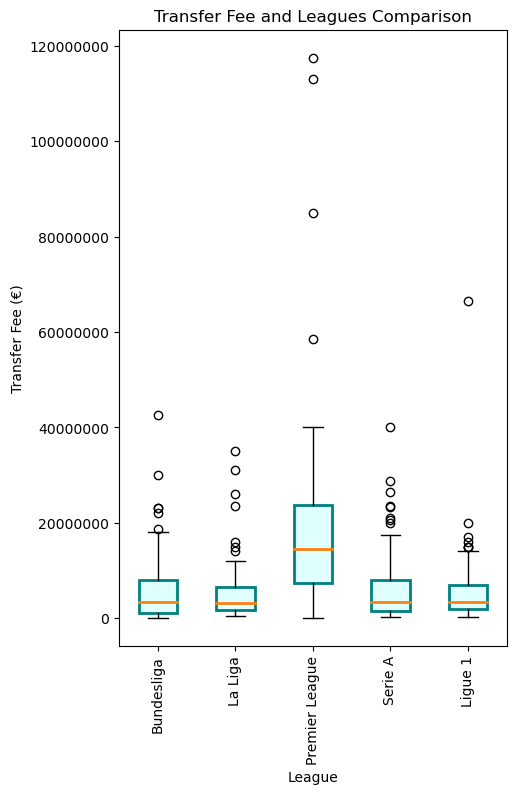

In [274]:
plt.style.use('default')

plt.figure(figsize=(5, 8))

Bundesliga = df_top5_leagues.loc[df_top5_leagues['League Destination']=='Bundesliga']['Transfer Fee (€)']
LaLiga = df_top5_leagues.loc[df_top5_leagues['League Destination']=='LaLiga']['Transfer Fee (€)']
PremierLeague = df_top5_leagues.loc[df_top5_leagues['League Destination']=='Premier League']['Transfer Fee (€)']
SerieA = df_top5_leagues.loc[df_top5_leagues['League Destination']=='Serie A']['Transfer Fee (€)']
Ligue1 = df_top5_leagues.loc[df_top5_leagues['League Destination']=='Ligue 1']['Transfer Fee (€)']




labels=['Bundesliga', 'La Liga', 'Premier League', 'Serie A', 'Ligue 1']


boxes = plt.boxplot([Bundesliga, LaLiga, PremierLeague, SerieA, Ligue1], 
                    labels=labels, patch_artist=True, medianprops={'linewidth':2})

plt.ticklabel_format(style='plain', axis='y')
plt.xticks( rotation = 'vertical', size=10)


for box in boxes['boxes']:
    # set edge color
    box.set(color='#008080', linewidth=2)
    # change fill color
    box.set(facecolor='#E0FFFF')

plt.title('Transfer Fee and Leagues Comparison')    
plt.xlabel('League')    
plt.ylabel('Transfer Fee (€)')    

    
    
plt.show()

### Bundesliga

In [275]:
Bundesliga1 = df_top5_leagues.loc[df_top5_leagues['League Destination']=='Bundesliga']
Bundesliga2 = Bundesliga1.groupby('Team Destination').sum()
BundesLigaClubs = Bundesliga2['Transfer Fee (€)'].to_frame().sort_values(by='Transfer Fee (€)', ascending=False)
BundesLigaClubs

,Transfer Fee (€)
Team Destination,
RB Leipzig,129620000
Bay. Leverkusen,65050000
FC Bayern,57500000
VfL Wolfsburg,52500000
Bor. Dortmund,45000000
Hertha BSC,25600000
Bor. M'gladbach,22300000
VfB Stuttgart,15250000
Union Berlin,13900000


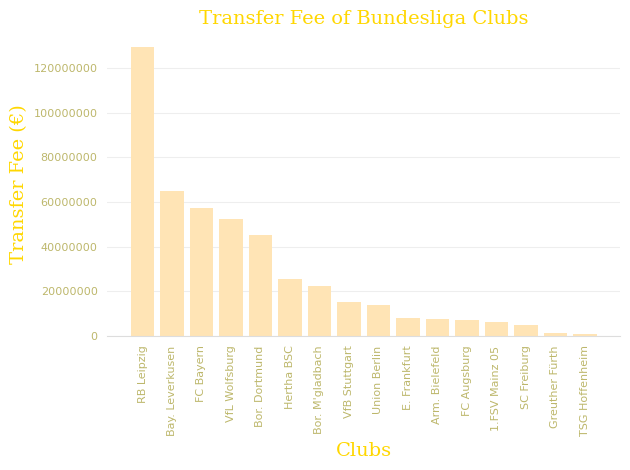

In [276]:
plt.rcdefaults()

font1 = {'family': 'serif',
        'color':  'gold',
        'weight': 'normal',
        'size': 14,
        }


result = Bundesliga2['Transfer Fee (€)'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.bar(BundesLigaClubs.index, result, color='moccasin')
plt.xticks(rotation='vertical')

plt.title('Transfer Fee of Bundesliga Clubs', fontdict= font1)

plt.xlabel('Clubs', fontdict=font1)
plt.xticks(color='darkkhaki', size=8)

plt.ylabel('Transfer Fee (€)', fontdict=font1)
plt.yticks(color='darkkhaki', size=8)
plt.ticklabel_format(style='plain', axis='y')



# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)






# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)



fig.tight_layout()

plt.show()



### LaLiga

In [277]:
LaLiga1 = df_top5_leagues.loc[df_top5_leagues['League Destination']=='LaLiga']
LaLiga2 = LaLiga1.groupby('Team Destination').sum()
LaLigaClubs = LaLiga2['Transfer Fee (€)'].to_frame().sort_values(by='Transfer Fee (€)', ascending=False)
LaLigaClubs

,Transfer Fee (€)
Team Destination,
Atlético Madrid,61000000
Villarreal,56500000
Sevilla FC,43500000
Real Madrid,31000000
Getafe,14500000
Barcelona,14000000
Valencia,11000000
Real Sociedad,10500000
RCD Mallorca,9000000


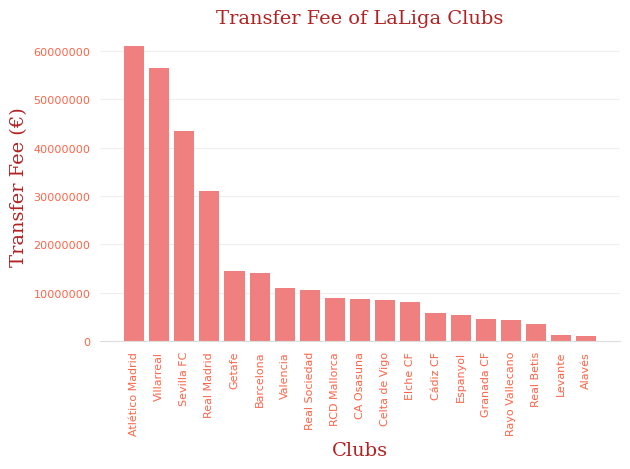

In [278]:
plt.rcdefaults()

font2 = {'family': 'serif',
        'color':  'firebrick',
        'weight': 'normal',
        'size': 14,
        }

result = LaLiga2['Transfer Fee (€)'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.bar(LaLigaClubs.index,result, color='lightcoral')
plt.xticks(rotation='vertical')

plt.title('Transfer Fee of LaLiga Clubs', fontdict=font2)

plt.xlabel('Clubs', fontdict=font2)
plt.xticks(color='tomato', size=8)

plt.ylabel('Transfer Fee (€)', fontdict=font2)
plt.yticks(color='tomato', size=8)
plt.ticklabel_format(style='plain', axis='y')



# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)







# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)



fig.tight_layout()

plt.show()

### Ligue  1

In [279]:

LigueOne1 = df_top5_leagues.loc[df_top5_leagues['League Destination']=='Ligue 1']
LigueOne2 = LigueOne1.groupby('Team Destination').sum()
LigueOneClubs = LigueOne2['Transfer Fee (€)'].to_frame().sort_values(by='Transfer Fee (€)', ascending=False)
LigueOneClubs

,Transfer Fee (€)
Team Destination,
Paris SG,82500000
Stade Rennais,79500000
OGC Nice,48000000
Marseille,45400000
Troyes,18100000
Lens,16100000
LOSC Lille,13000000
Stade Brestois,9500000
G. Bordeaux,8800000


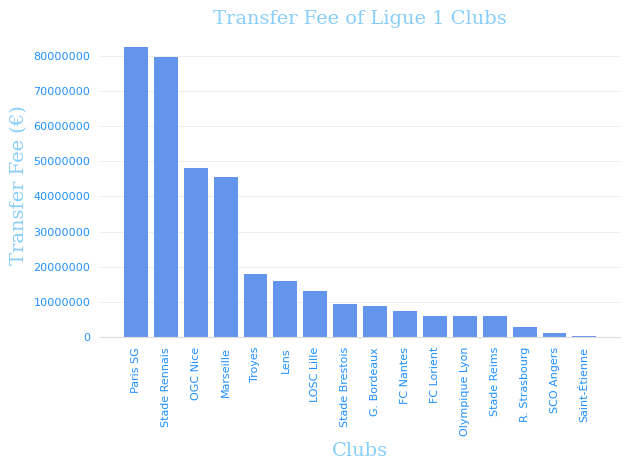

In [280]:
plt.rcdefaults()

font3 = {'family': 'serif',
        'color':  'lightskyblue',
        'weight': 'normal',
        'size': 14,
        }

result = LigueOne2['Transfer Fee (€)'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.bar(LigueOneClubs.index, result, color='cornflowerblue')
plt.xticks(rotation='vertical')

plt.title('Transfer Fee of Ligue 1 Clubs', fontdict= font3)

plt.xlabel('Clubs', fontdict=font3)
plt.xticks(color='dodgerblue', size=8)

plt.ylabel('Transfer Fee (€)', fontdict=font3)
plt.yticks(color='dodgerblue', size=8)
plt.ticklabel_format(style='plain', axis='y')



# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)




# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)



fig.tight_layout()

plt.show()

### Premier League


In [281]:
PremierLeague1 = df_top5_leagues.loc[df_top5_leagues['League Destination']=='Premier League']
PremierLeague2 = PremierLeague1.groupby('Team Destination').sum()
PremierLeagueClubs = PremierLeague2['Transfer Fee (€)'].to_frame().sort_values(by='Transfer Fee (€)', ascending=False)
PremierLeagueClubs

,Transfer Fee (€)
Team Destination,
Arsenal,165600000
Man Utd,161300000
Man City,136000000
Aston Villa,115620000
Chelsea,113000000
West Ham,92000000
Crystal Palace,73440000
Leicester,67600000
Spurs,66900000


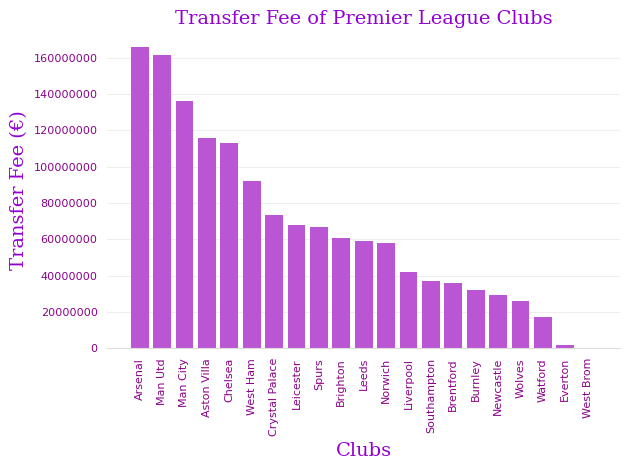

In [282]:

fig, ax = plt.subplots()


font4 = {'family': 'serif',
        'color':  'darkviolet',
        'weight': 'normal',
        'size': 14,
        }
result = PremierLeague2['Transfer Fee (€)'].sort_values(ascending=False)

ax.bar(PremierLeagueClubs.index, result, color='mediumorchid')
plt.xticks(rotation='vertical')

plt.title('Transfer Fee of Premier League Clubs', fontdict= font4)

plt.xlabel('Clubs', fontdict=font4)
plt.xticks(color='darkmagenta', size=8)

plt.ylabel('Transfer Fee (€)', fontdict=font4)
plt.yticks(color='darkmagenta', size=8)
plt.ticklabel_format(style='plain', axis='y')



# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)



# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)



fig.tight_layout()

plt.show()

### Serie A

In [283]:
SerieA1 = df_top5_leagues.loc[df_top5_leagues['League Destination']=='Serie A']
SerieA2 = SerieA1.groupby('Team Destination').sum()
SerieAClubs = SerieA2['Transfer Fee (€)'].to_frame().sort_values(by='Transfer Fee (€)', ascending=False)
SerieAClubs

,Transfer Fee (€)
Team Destination,
AS Roma,124250000
Atalanta BC,77600000
AC Milan,64000000
Juventus,47200000
Genoa,34800000
Fiorentina,34200000
Inter,31800000
Hellas Verona,31000000
Sassuolo,30250000


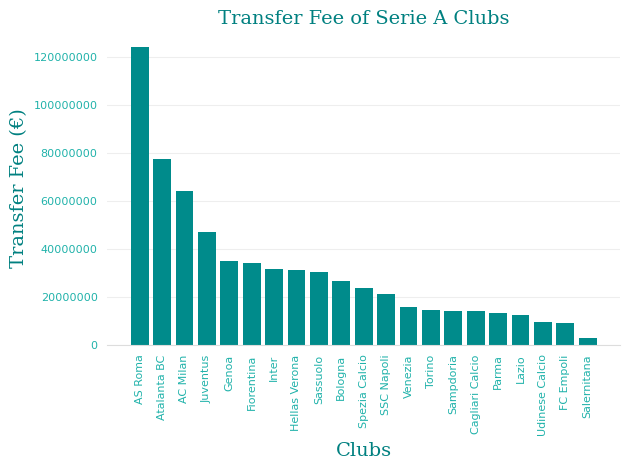

In [284]:
plt.rcdefaults()

font5 = {'family': 'serif',
        'color':  'teal',
        'weight': 'normal',
        'size': 14,
        }

result = SerieA2['Transfer Fee (€)'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.bar(SerieAClubs.index, result, color='darkcyan')
plt.xticks(rotation='vertical')

plt.title('Transfer Fee of Serie A Clubs', fontdict= font5)

plt.xlabel('Clubs', fontdict=font5)
plt.xticks(color='lightseagreen', size=8)

plt.ylabel('Transfer Fee (€)', fontdict=font5)
plt.yticks(color='lightseagreen', size=8)
plt.ticklabel_format(style='plain', axis='y')



# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)




# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)



fig.tight_layout()

plt.show()

In [285]:
df_top5_leagues

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1
Joe Scally,Right-Back,18,New York City,United States,MLS,Bor. M'gladbach,Germany,Bundesliga,1800000,2021-01-01,1
Frederik Alves,Centre-Back,21,Silkeborg IF,Denmark,1.Division,West Ham,England,Premier League,1600000,2021-01-01,1
Amad Diallo,Right Winger,18,Atalanta BC,Italy,Serie A,Man Utd,England,Premier League,21300000,2021-01-02,1
...,...,...,...,...,...,...,...,...,...,...,...
Jakub Kiwior,Centre-Back,21,MSK Zilina,Slovakia,Fortuna Liga,Spezia Calcio,Italy,Serie A,1500000,2021-08-31,8
Ridgeciano Haps,Left-Back,28,Feyenoord,Netherlands,Eredivisie,Venezia,Italy,Serie A,500000,2021-08-31,8
Nick Viergever,Centre-Back,32,PSV Eindhoven,Netherlands,Eredivisie,Greuther Fürth,Germany,Bundesliga,300000,2021-08-31,8


### The analysis of transfers based on League and Positions

In [286]:
df_top5_leagues_pivot = df_top5_leagues.copy(deep=True)

In [287]:
df_top5_leagues_pivot['Position2'] = df_top5_leagues['Position']

In [288]:
df_top5_leagues_pivot

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month,Position2
Player,,,,,,,,,,,,
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1,Left Winger
Filip Stevanovic,Left Winger,18,Partizan,Serbia,Super liga Srbije,Man City,England,Premier League,8500000,2021-01-01,1,Left Winger
Joe Scally,Right-Back,18,New York City,United States,MLS,Bor. M'gladbach,Germany,Bundesliga,1800000,2021-01-01,1,Right-Back
Frederik Alves,Centre-Back,21,Silkeborg IF,Denmark,1.Division,West Ham,England,Premier League,1600000,2021-01-01,1,Centre-Back
Amad Diallo,Right Winger,18,Atalanta BC,Italy,Serie A,Man Utd,England,Premier League,21300000,2021-01-02,1,Right Winger
...,...,...,...,...,...,...,...,...,...,...,...,...
Jakub Kiwior,Centre-Back,21,MSK Zilina,Slovakia,Fortuna Liga,Spezia Calcio,Italy,Serie A,1500000,2021-08-31,8,Centre-Back
Ridgeciano Haps,Left-Back,28,Feyenoord,Netherlands,Eredivisie,Venezia,Italy,Serie A,500000,2021-08-31,8,Left-Back
Nick Viergever,Centre-Back,32,PSV Eindhoven,Netherlands,Eredivisie,Greuther Fürth,Germany,Bundesliga,300000,2021-08-31,8,Centre-Back


In [289]:
LeagueDestinationAndPosition = df_top5_leagues_pivot.pivot_table(values="Position2", 
                              aggfunc='count',
                              index='League Destination', 
                              columns='Position',
                             fill_value='0')
                            

In [290]:
LeagueDestinationAndPosition

Position,Attacking Midfield,Central Midfield,Centre-Back,Centre-Forward,Defensive Midfield,Goalkeeper,Left Midfield,Left Winger,Left-Back,Right Midfield,Right Winger,Right-Back,Second Striker
League Destination,,,,,,,,,,,,,
Bundesliga,5.0,11.0,10.0,9.0,4.0,8.0,1.0,5.0,3.0,0,5.0,5.0,3.0
LaLiga,1.0,5.0,5.0,11.0,4.0,3.0,1.0,4.0,8.0,0,1.0,4.0,1.0
Ligue 1,3.0,6.0,9.0,4.0,8.0,4.0,1.0,4.0,5.0,0,4.0,5.0,0
Premier League,3.0,10.0,15.0,8.0,2.0,5.0,0,13.0,6.0,1.0,6.0,3.0,0
Serie A,8.0,13.0,22.0,19.0,6.0,8.0,0,4.0,7.0,2.0,6.0,10.0,0


In [291]:
df_top5_leagues.loc[(df_top5_leagues['League Destination'] =='Bundesliga') & (df_top5_leagues['Position'] =='Centre-Forward') ]

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Georginio Rutter,Centre-Forward,18,Stade Rennais,France,Ligue 1,TSG Hoffenheim,Germany,Bundesliga,750000,2021-02-01,2
Florian Krüger,Centre-Forward,22,Erzgebirge Aue,Germany,2. Bundesliga,Arm. Bielefeld,Germany,Bundesliga,1000000,2021-07-01,7
André Silva,Centre-Forward,25,E. Frankfurt,Germany,Bundesliga,RB Leipzig,Germany,Bundesliga,23000000,2021-07-02,7
Lukas Nmecha,Centre-Forward,22,Man City,England,Premier League,VfL Wolfsburg,Germany,Bundesliga,8000000,2021-07-16,7
Taiwo Awoniyi,Centre-Forward,23,Liverpool,England,Premier League,Union Berlin,Germany,Bundesliga,6500000,2021-07-20,7
Donyell Malen,Centre-Forward,22,PSV Eindhoven,Netherlands,Eredivisie,Bor. Dortmund,Germany,Bundesliga,30000000,2021-07-27,7
Ishak Belfodil,Centre-Forward,29,TSG Hoffenheim,Germany,Bundesliga,Hertha BSC,Germany,Bundesliga,500000,2021-08-23,8
Igor Matanovic,Centre-Forward,18,FC St. Pauli,Germany,2. Bundesliga,E. Frankfurt,Germany,Bundesliga,500000,2021-08-30,8
Wahid Faghir,Centre-Forward,18,Vejle BK,Denmark,Superligaen,VfB Stuttgart,Germany,Bundesliga,4500000,2021-08-31,8


In [292]:
df_top5_leagues.groupby(['League Destination', 'Player','Team Destination','Position'])['Transfer Fee (€)'].agg([np.sum])


sum
League Destination Player            Team Destination Position                    
Bundesliga         Amine Adli        Bay. Leverkusen  Right Winger         7500000
                   André Silva       RB Leipzig       Centre-Forward      23000000
                   Angeliño          RB Leipzig       Left Midfield       18000000
                   Anton Stach       1.FSV Mainz 05   Defensive Midfield   3500000
                   Aster Vranckx     VfL Wolfsburg    Central Midfield     8000000
...                                                                            ...
Serie A            Vincenzo Fiorillo Salernitana      Goalkeeper            600000
                   Weston McKennie   Juventus         Central Midfield    20500000
                   Yacine Adli       AC Milan         Attacking Midfield   8000000
                   Youssef Maleh     Fiorentina       Central Midfield      700000
                   Zinho Vanheusden  Inter            Centre-Back         16000000

[347 rows x 1 columns]

In [293]:
df_top5_leagues.groupby(['League Destination', 'Position'])['Age'].agg([np.mean])

mean
League Destination Position                     
Bundesliga         Attacking Midfield  22.200000
                   Central Midfield    22.363636
                   Centre-Back         22.000000
                   Centre-Forward      21.888889
                   Defensive Midfield  23.500000
...                                          ...
Serie A            Left Winger         23.500000
                   Left-Back           22.571429
                   Right Midfield      29.500000
                   Right Winger        22.166667
                   Right-Back          24.100000

[57 rows x 1 columns]

In [294]:
df_top5_leagues.groupby(['League Destination', 'Position'])['Transfer Fee (€)'].agg([np.sum])



sum
League Destination Position                     
Bundesliga         Attacking Midfield   20070000
                   Central Midfield     73750000
                   Centre-Back         124650000
                   Centre-Forward       74750000
                   Defensive Midfield   12250000
...                                          ...
Serie A            Left Winger          42200000
                   Left-Back            27130000
                   Right Midfield       15000000
                   Right Winger         38100000
                   Right-Back           44550000

[57 rows x 1 columns]

### Top 25 Most Expensive and Cheapeast Players

In [295]:
Top25PlayersOfTransferFee = df_top5_leagues.nlargest(25,'Transfer Fee (€)')
Top25PlayersOfTransferFee['Transfer Fee (€)'] = Top25PlayersOfTransferFee['Transfer Fee (€)'] / 1000000
Top25PlayersOfTransferFee

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Jack Grealish,Left Winger,25,Aston Villa,England,Premier League,Man City,England,Premier League,117.50,2021-08-05,8
Romelu Lukaku,Centre-Forward,28,Inter,Italy,Serie A,Chelsea,England,Premier League,113.00,2021-08-12,8
Jadon Sancho,Left Winger,21,Bor. Dortmund,Germany,Bundesliga,Man Utd,England,Premier League,85.00,2021-07-23,7
Achraf Hakimi,Right-Back,22,Inter,Italy,Serie A,Paris SG,France,Ligue 1,66.50,2021-07-06,7
Ben White,Centre-Back,23,Brighton,England,Premier League,Arsenal,England,Premier League,58.50,2021-07-30,7
Dayot Upamecano,Centre-Back,22,RB Leipzig,Germany,Bundesliga,FC Bayern,Germany,Bundesliga,42.50,2021-07-05,7
Ibrahima Konaté,Centre-Back,22,RB Leipzig,Germany,Bundesliga,Liverpool,England,Premier League,40.00,2021-07-01,7
Raphaël Varane,Centre-Back,28,Real Madrid,Spain,LaLiga,Man Utd,England,Premier League,40.00,2021-08-14,8
Tammy Abraham,Centre-Forward,23,Chelsea,England,Premier League,AS Roma,Italy,Serie A,40.00,2021-08-17,8


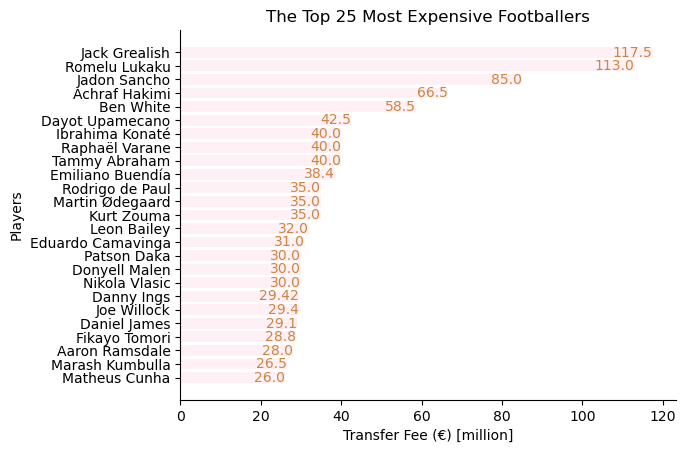

In [296]:
Fee =Top25PlayersOfTransferFee['Transfer Fee (€)'].sort_values(ascending=False)
Players = Top25PlayersOfTransferFee.index

fig, ax = plt.subplots()
plt.style.use('default') 


plt.barh(Players, Fee, color='#FFF0F5')
plt.gca().invert_yaxis()

for index, value in enumerate(Fee):
    plt.text(value, index, str(value),horizontalalignment='right',verticalalignment='center', color='#CD853F')

plt.title('The Top 25 Most Expensive Footballers')
ax.set_ylabel('Players')
ax.set_xlabel('Transfer Fee (€) [million]')
plt.ticklabel_format(style='plain', axis='x')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


In [297]:
Bottom25Players = df_top5_leagues.nsmallest(25,'Transfer Fee (€)').sort_values('Transfer Fee (€)')
Bottom25Players['Transfer Fee (€)'] = Bottom25Players['Transfer Fee (€)'] / 1000000
Bottom25Players

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Diant Ramaj,Goalkeeper,19,1.FC Heidenheim,Germany,2. Bundesliga,E. Frankfurt,Germany,Bundesliga,0.10,2021-07-01,7
Robert Snodgrass,Right Winger,33,West Ham,England,Premier League,West Brom,England,Premier League,0.11,2021-01-08,1
Reda Boultam,Attacking Midfield,23,Triestina,Italy,Serie C - A,Salernitana,Italy,Serie A,0.20,2021-07-01,7
Daniel Klein,Goalkeeper,20,Hoffenheim II,Germany,Regionalliga Südwest,FC Augsburg,Germany,Bundesliga,0.20,2021-07-02,7
Luka Romero,Attacking Midfield,16,RCD Mallorca B,Spain,Spain,Lazio,Italy,Serie A,0.20,2021-07-20,7
David Schnegg,Left-Back,22,LASK,Austria,Bundesliga,Venezia,Italy,Serie A,0.25,2021-07-01,7
Jens Grahl,Goalkeeper,32,VfB Stuttgart,Germany,Bundesliga,E. Frankfurt,Germany,Bundesliga,0.25,2021-07-19,7
Pietro Cianci,Centre-Forward,25,Teramo,Italy,Serie C - B,Sassuolo,Italy,Serie A,0.25,2021-08-12,8
Sebastian Griesbeck,Defensive Midfield,30,Union Berlin,Germany,Bundesliga,Greuther Fürth,Germany,Bundesliga,0.25,2021-08-31,8


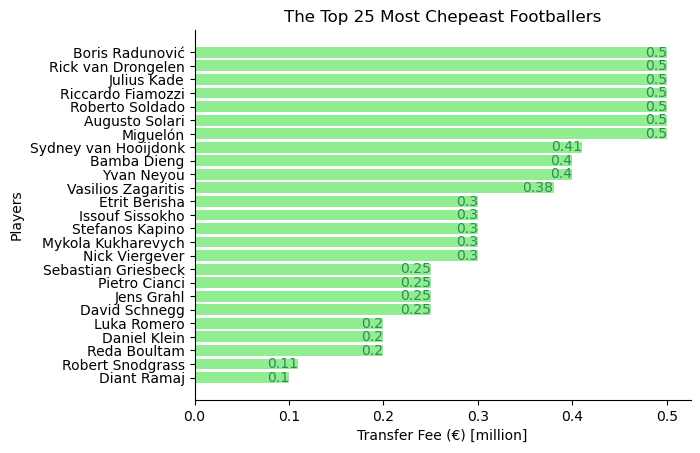

In [298]:
FeeBottom = Bottom25Players['Transfer Fee (€)'].sort_values(ascending=True)
PlayersBottom = Bottom25Players.index

fig, ax = plt.subplots()

plt.barh(PlayersBottom, FeeBottom, color='#90EE90')

#plt.gca().invert_yaxis()

for index, value in enumerate(FeeBottom):
    plt.text(value, index, str(value),horizontalalignment='right',verticalalignment='center', color='#2E8B57')

plt.title('The Top 25 Most Chepeast Footballers')
ax.set_ylabel('Players')
ax.set_xlabel('Transfer Fee (€) [million]')
plt.ticklabel_format(style='plain', axis='x')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


### Top 10 Transfer Fee per League

In [299]:
a = df_top5_leagues.groupby(['League Destination'])

In [300]:
a.get_group('Bundesliga').nlargest(10,'Transfer Fee (€)')

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Dayot Upamecano,Centre-Back,22,RB Leipzig,Germany,Bundesliga,FC Bayern,Germany,Bundesliga,42500000,2021-07-05,7
Donyell Malen,Centre-Forward,22,PSV Eindhoven,Netherlands,Eredivisie,Bor. Dortmund,Germany,Bundesliga,30000000,2021-07-27,7
André Silva,Centre-Forward,25,E. Frankfurt,Germany,Bundesliga,RB Leipzig,Germany,Bundesliga,23000000,2021-07-02,7
Odilon Kossounou,Centre-Back,20,Club Brugge,Belgium,Jupiler Pro League,Bay. Leverkusen,Germany,Bundesliga,23000000,2021-07-22,7
Dominik Szoboszlai,Left Winger,20,RB Salzburg,Austria,Bundesliga,RB Leipzig,Germany,Bundesliga,22000000,2021-01-01,1
Josko Gvardiol,Centre-Back,19,Dinamo Zagreb,Croatia,1.HNL,RB Leipzig,Germany,Bundesliga,18800000,2021-07-01,7
Angeliño,Left Midfield,24,Man City,England,Premier League,RB Leipzig,Germany,Bundesliga,18000000,2021-07-01,7
Ilaix Moriba,Central Midfield,18,Barcelona B,Spain,Primera Div. R.F.E.F. - Gr. II,RB Leipzig,Germany,Bundesliga,16000000,2021-08-31,8
Benjamin Henrichs,Right-Back,24,Monaco,Monaco,Ligue 1,RB Leipzig,Germany,Bundesliga,15000000,2021-07-01,7


In [301]:
a.get_group('LaLiga').nlargest(10,'Transfer Fee (€)')

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Rodrigo de Paul,Central Midfield,27,Udinese Calcio,Italy,Serie A,Atlético Madrid,Spain,LaLiga,35000000,2021-07-12,7
Eduardo Camavinga,Central Midfield,18,Stade Rennais,France,Ligue 1,Real Madrid,Spain,LaLiga,31000000,2021-08-31,8
Matheus Cunha,Centre-Forward,22,Hertha BSC,Germany,Bundesliga,Atlético Madrid,Spain,LaLiga,26000000,2021-08-25,8
Arnaut Danjuma,Left Winger,24,Bournemouth,England,Championship,Villarreal,Spain,LaLiga,23500000,2021-08-19,8
Rafa Mir,Centre-Forward,24,Wolves,England,Premier League,Sevilla FC,Spain,LaLiga,16000000,2021-08-20,8
Juan Foyth,Centre-Back,23,Spurs,England,Premier League,Villarreal,Spain,LaLiga,15000000,2021-07-01,7
Emerson Royal,Right-Back,22,Real Betis,Spain,LaLiga,Barcelona,Spain,LaLiga,14000000,2021-07-01,7
Boulaye Dia,Centre-Forward,24,Stade Reims,France,Ligue 1,Villarreal,Spain,LaLiga,12000000,2021-07-13,7
Gonzalo Montiel,Right-Back,24,River Plate,Argentina,Liga Profesional,Sevilla FC,Spain,LaLiga,11000000,2021-08-13,8


In [302]:
a.get_group('Ligue 1').nlargest(10,'Transfer Fee (€)')

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Achraf Hakimi,Right-Back,22,Inter,Italy,Serie A,Paris SG,France,Ligue 1,66500000,2021-07-06,7
Gerson,Central Midfield,24,Flamengo,Brazil,Série A,Marseille,France,Ligue 1,20000000,2021-07-01,7
Loïc Badé,Centre-Back,21,Lens,France,Ligue 1,Stade Rennais,France,Ligue 1,17000000,2021-07-05,7
Danilo Pereira,Defensive Midfield,29,FC Porto,Portugal,Liga Bwin,Paris SG,France,Ligue 1,16000000,2021-07-01,7
Calvin Stengs,Right Winger,22,AZ Alkmaar,Netherlands,Eredivisie,OGC Nice,France,Ligue 1,15000000,2021-07-14,7
Kamaldeen Sulemana,Left Winger,19,Nordsjaelland,Denmark,Superligaen,Stade Rennais,France,Ligue 1,15000000,2021-07-16,7
Gaëtan Laborde,Centre-Forward,27,Montpellier,France,Ligue 1,Stade Rennais,France,Ligue 1,15000000,2021-08-31,8
Baptiste Santamaria,Defensive Midfield,26,SC Freiburg,Germany,Bundesliga,Stade Rennais,France,Ligue 1,14000000,2021-08-17,8
Lovro Majer,Attacking Midfield,23,Dinamo Zagreb,Croatia,1.HNL,Stade Rennais,France,Ligue 1,12000000,2021-08-26,8


In [303]:
a.get_group('Premier League').nlargest(10,'Transfer Fee (€)')

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Jack Grealish,Left Winger,25,Aston Villa,England,Premier League,Man City,England,Premier League,117500000,2021-08-05,8
Romelu Lukaku,Centre-Forward,28,Inter,Italy,Serie A,Chelsea,England,Premier League,113000000,2021-08-12,8
Jadon Sancho,Left Winger,21,Bor. Dortmund,Germany,Bundesliga,Man Utd,England,Premier League,85000000,2021-07-23,7
Ben White,Centre-Back,23,Brighton,England,Premier League,Arsenal,England,Premier League,58500000,2021-07-30,7
Ibrahima Konaté,Centre-Back,22,RB Leipzig,Germany,Bundesliga,Liverpool,England,Premier League,40000000,2021-07-01,7
Raphaël Varane,Centre-Back,28,Real Madrid,Spain,LaLiga,Man Utd,England,Premier League,40000000,2021-08-14,8
Emiliano Buendía,Right Winger,24,Norwich,England,Premier League,Aston Villa,England,Premier League,38400000,2021-07-01,7
Martin Ødegaard,Attacking Midfield,22,Real Madrid,Spain,LaLiga,Arsenal,England,Premier League,35000000,2021-08-20,8
Kurt Zouma,Centre-Back,26,Chelsea,England,Premier League,West Ham,England,Premier League,35000000,2021-08-28,8


In [304]:
a.get_group('Serie A').nlargest(10,'Transfer Fee (€)')

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Tammy Abraham,Centre-Forward,23,Chelsea,England,Premier League,AS Roma,Italy,Serie A,40000000,2021-08-17,8
Fikayo Tomori,Centre-Back,23,Chelsea,England,Premier League,AC Milan,Italy,Serie A,28800000,2021-07-01,7
Marash Kumbulla,Centre-Back,21,Hellas Verona,Italy,Serie A,AS Roma,Italy,Serie A,26500000,2021-07-01,7
Nicolás González,Left Winger,23,VfB Stuttgart,Germany,Bundesliga,Fiorentina,Italy,Serie A,23500000,2021-07-01,7
Nicolò Rovella,Defensive Midfield,19,Genoa,Italy,Serie A,Juventus,Italy,Serie A,23300000,2021-01-28,1
Matteo Politano,Right Winger,27,Inter,Italy,Serie A,SSC Napoli,Italy,Serie A,21000000,2021-07-01,7
Weston McKennie,Central Midfield,22,FC Schalke 04,Germany,2. Bundesliga,Juventus,Italy,Serie A,20500000,2021-07-01,7
Juan Musso,Goalkeeper,27,Udinese Calcio,Italy,Serie A,Atalanta BC,Italy,Serie A,20000000,2021-07-02,7
Eldor Shomurodov,Centre-Forward,26,Genoa,Italy,Serie A,AS Roma,Italy,Serie A,17500000,2021-08-02,8


### The selection of Players that are on loan

In [305]:
df_loan_players = df.loc[df['Transfer Fee (€)'] == 0]
df_loan_players

,Position,Age,Team Origin,Country Origin,League Origin,Team Destination,Country Destination,League Destination,Transfer Fee (€),Date,Month
Player,,,,,,,,,,,
Artem Milevskyi,Centre-Forward,35,Dynamo Brest,Belarus,Vysheyshaya Liga,FK Minaj,Ukraine,Premier Liga,0,2021-01-01,1
Gino Parson,Attacking Midfield,41,Stadtallendorf,Germany,Regionalliga Südwest,FC Gießen,Germany,Regionalliga Südwest,0,2021-01-01,1
Behrang Safari,Left-Back,35,Malmö FF,Sweden,Allsvenskan,Lunds SK,Sweden,Sweden,0,2021-01-01,1
Ariel Cólzera,Second Striker,34,CA Temperley,Argentina,Primera Nacional,Deportivo Merlo,Argentina,Argentina,0,2021-01-01,1
Robbie Weir,Central Midfield,32,Waterford FC,Ireland,Premier Division,Crusaders,Northern Ireland,Premiership,0,2021-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...
Raffaele Scuderi,Right Midfield,19,Cerignola,Italy,Serie D - H,Este,Italy,Serie D - C,0,2021-12-31,12
Emiliano Tortolano,Right Winger,31,Pomezia,Italy,Italy,Rieti,Italy,Serie D - E,0,2021-12-31,12
Dylan Kambo,Central Midfield,26,RG Ticino,Italy,Serie D - A,Borgovercelli,Italy,Italy,0,2021-12-31,12


#### The quantity of Player are on loan Country Destination

In [306]:
df_loan_players['Country Destination'].value_counts()

Italy         5889
Spain         2401
Turkey        1769
Russia        1752
Germany       1559
              ... 
Vanuatu          1
Cameroon         1
Mozambique       1
Grenada          1
East Timor       1
Name: Country Destination, Length: 173, dtype: int64

# The end of the analysis

In [307]:
df.to_csv('TransferOfFootballPlayersCleaned.csv')